In [1]:
from subprocess import Popen, PIPE
from parse import parse
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

import time

In [2]:
program_path = 'Project1.exe'

In [3]:
def run_experiment(program_path: str, num_records: int):
    p = Popen(program_path, stdin=PIPE, stdout=PIPE, stderr=PIPE, encoding='UTF-8')
    p.stdin.write('2\n2\n{}\n'.format(num_records))
    p.stdin.flush()
    stdout = p.stdout.read()
    
    parsed = parse("{}Number of phases: {}\nAll disk page reads: {}\nAll disk page writes: {}\n", stdout)
    phases = int(parsed[1])
    reads = int(parsed[2])
    writes = int(parsed[3])
    return phases, reads, writes

In [4]:
def worst_case_phases(n: int):
    return math.ceil(math.log2(n))

In [5]:
def worst_case_reads_writes(n: int, b: int):
    return 4*n*math.ceil(math.log2(n))/b

In [6]:
num_records = [10**n for n in range(1, 7)] # {10, 100, ..., 1 000 000}

In [7]:
phases = []
reads = []
writes = []
for n in num_records:
    p, r, w = run_experiment(program_path, n)
    phases.append(p)
    reads.append(r)
    writes.append(w)

In [8]:
record_size = 44           # 1x4B + 10x4B = 44B
disk_page_size = 4096      # Disk page size used in simulation
blocking_factor = 4096//44

In [9]:
x = np.arange(num_records[0], num_records[-1], 1)
worst_phases = np.vectorize(worst_case_phases)(x)

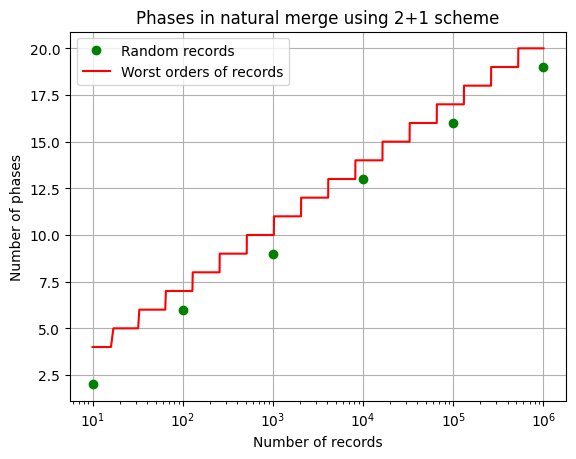

In [20]:
fig = plt.figure()
plt.xscale('log')
plt.title('Phases in natural merge using 2+1 scheme')
plt.xlabel('Number of records')
plt.ylabel('Number of phases')
plt.grid()
plt.plot(num_records, phases, 'go', label="Random records")
plt.plot(x, worst_phases, 'r-', label="Worst orders of records")
plt.legend()
plt.show()

In [11]:
x = np.arange(num_records[0], num_records[-1], 1)
worst_reads = np.vectorize(worst_case_reads_writes)(x, blocking_factor)

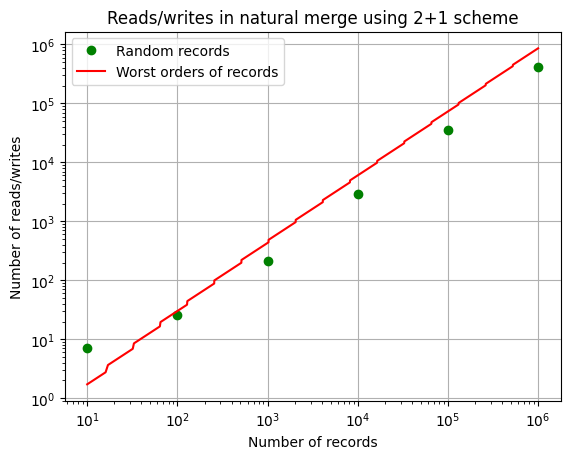

In [32]:
fig = plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.title('Reads/writes in natural merge using 2+1 scheme')
plt.xlabel('Number of records')
plt.ylabel('Number of reads/writes')
plt.grid()
plt.plot(num_records, reads, 'go', label="Random records")
plt.plot(x, worst_reads,'r-', label="Worst orders of records")
plt.plot()
plt.legend()
plt.show()